<a href="https://colab.research.google.com/github/SMichael2021/Home1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D0%B8%D1%81%D0%BA%D0%B0_%D1%80%D0%B0%D0%B7%D0%B2%D0%B8%D1%82%D0%B8%D1%8F_%D1%81%D0%B5%D1%80%D0%B4%D0%B5%D1%87%D0%BD%D0%BE_%D1%81%D0%BE%D1%81%D1%83%D0%B4%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D0%BE_%D0%B7%D0%B0%D0%B1%D0%BE%D0%BB%D0%B5%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BF%D0%B0%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%B0_(%D0%B4%D0%B5%D0%BA%D0%B0%D0%B1%D1%80%D1%8C)_%7C_%D0%A3%D0%98%D0%98%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Подключение библиотек
# Подключение библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import gdown
import warnings                    # Управление предупреждениями
warnings.filterwarnings("ignore")  # 'ignore'   Никогда не печатать соответствующие предупреждения
sns.set_style('darkgrid')

from tensorflow.keras.metrics import Precision, Recall

metrics = [
    'accuracy',
    Recall(name="recall"),
    Precision(name="precision")
]

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

class Worker:
  def __init__(self):
    self.dsname = None

  def load_dataset(self):
    self.dsname=gdown.download('https://storage.yandexcloud.net/aiueducation/marketing/datasets/medicine.csv', None, quiet=True)
    print(f'Датасет загружен!\n')

  def show_dataset(self):
    self.dftrain = pd.read_csv(self.dsname, index_col=0)
    # Удаляем не нужный столбец 
    del self.dftrain['ID_y']
    display(self.dftrain.head())


  def dataset_info(self):
    for col in self.dftrain.columns:        
      print(f'----- Параметр {col} -----')
      data = self.dftrain[col].value_counts()
      plt.figure(figsize=(14,6))
      plt.xticks(rotation='vertical')
      xlabels = [f'{x} ({y})' for x,y in zip(list(data.index), data)]
      plt.bar(xlabels[::-1], data[::-1])
      plt.show()

  # Конвертация данных в числовое представление
  def convertToNumeric(self, columns):
    self.dfnumeric = self.dftrain.copy()
    le = LabelEncoder() 
    for feat in columns:
        self.dfnumeric[feat] = le.fit_transform(self.dfnumeric[feat].astype(str))
    self.dfnumeric.fillna(0, inplace=True)
    display(self.dfnumeric.head())

  def matrix_corr(self):
    ###   КОРРЕЛЯЦИЯ - КРИТЕРИЙ СПИРМЕНА
    # Метод, подсчитывающий попарную корреляцию для элементов.
    corr_matrix = self.dfnumeric.corr('spearman') 

    # Можно указать в параметрах способ подсчета.
    plt.figure(figsize=(25, 25))
    sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
                linecolor='black', annot = True, fmt='.1g') 

    plt.show()

  def create_sets(self):
    # Формирование выборки x
    colX = list(self.dfnumeric.columns[:-5])
    x_data = self.dfnumeric[colX].values
    colY = list(self.dfnumeric.columns[-5:])
    y_data = self.dfnumeric.iloc[:, -5:].values
    # Разбиение общей выборки на обучающую и проверочную 
    self.x_train, self.x_val, self.y_train, self.y_val  = train_test_split(x_data, y_data,
                                                    test_size=0.1, 
                                                    shuffle=True,
                                                    random_state = 14)
    print('Выборки созданы! Размеры:')
    print(f'x_train: {self.x_train.shape}')
    print(f'y_train: {self.y_train.shape}')
    print(f'x_val: {self.x_val.shape}')
    print(f'y_val: {self.y_val.shape}')


  def show_learning_information(self, history):
    print('График обучения:')
    # Создание полотна для рисунка
    f, ax = plt.subplots(1, 3, figsize=(20, 6))

    # Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
    ax[0].plot(history.history['accuracy'], 
            label='Доля верных ответов на обучающем наборе')
    ax[0].plot(history.history['val_accuracy'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[0].set_title('Метрика: accuracy')

    ax[1].plot(history.history['precision'], 
            label='Доля верных ответов на обучающем наборе')
    ax[1].plot(history.history['val_precision'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[1].set_title('Метрика: precision')

    ax[2].plot(history.history['recall'], 
            label='Доля верных ответов на обучающем наборе')
    ax[2].plot(history.history['val_recall'], 
            label='Доля верных ответов на проверочном наборе')
    # Задание подписей осей 
    ax[2].set_title('Метрика: recall')
    # Фиксация графиков и рисование всей картинки
    plt.show()
    print(f'Максимальная точность на обучающей выборке: {round(np.array(history.history["accuracy"]).max(), 3)}')
    print(f'Максимальная точность на проверочной выборке: {round(np.array(history.history["val_accuracy"]).max(), 3)}')
    
    print(f'Максимальная метрика precision  на обучающей выборке: {round(np.array(history.history["precision"]).max(), 3)}')
    print(f'Максимальная метрика precision  на проверочной выборке: {round(np.array(history.history["val_precision"]).max(), 3)}')
    
    print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(history.history["recall"]).max(), 3)}')
    print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(history.history["val_recall"]).max(), 3)}')



  def train_model(self, funcModel, count):
    # Обучение модели сверточной нейронной сети подготовленных данных
    cnt = count
    history_accuracy = []
    history_val_accuracy = []
    history_recall = []
    history_val_recall = []
    history_precision = []
    history_val_precision  = []
    for i in range(cnt):
      model = funcModel()      
      store_learning = model.fit(self.x_train,
                                self.y_train,
                                validation_data=(self.x_val, self.y_val),
                                shuffle=True,
                                batch_size=25,
                                epochs=50, 
                                verbose=0)
      history_accuracy.append(store_learning.history['accuracy'])
      history_val_accuracy.append(store_learning.history['val_accuracy'])
      history_accuracy.append(store_learning.history['accuracy'])
      history_val_accuracy.append(store_learning.history['val_accuracy'])

      history_recall.append(store_learning.history['recall'])
      history_val_recall.append(store_learning.history['val_recall'])

      history_precision.append(store_learning.history['precision'])
      history_val_precision.append(store_learning.history['val_precision'])
      print(f'{bcolors.BOLD}{bcolors.OKBLUE}Обучение №{i+1} завершено. Результаты{bcolors.ENDC}')
      print(f'Максимальная точность на обучающей выборке: {round(np.array(store_learning.history["accuracy"]).max(), 3)}')
      print(f'Максимальная точность на проверочной выборке: {round(np.array(store_learning.history["val_accuracy"]).max(), 3)}')
      print()
      print(f'Максимальная метрика precision на обучающей выборке: {round(np.array(store_learning.history["precision"]).max(), 3)}')
      print(f'Максимальная метрика precision на проверочной выборке: {round(np.array(store_learning.history["val_precision"]).max(), 3)}')
      print()
      print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(store_learning.history["recall"]).max(), 3)}')
      print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(store_learning.history["val_recall"]).max(), 3)}')
      
      print('\n'*3)
    print(f'{bcolors.BOLD}###############################################################################{bcolors.ENDC}')
    print(f'{bcolors.HEADER} Финальные результаты{bcolors.ENDC}')
    print(f'Средняя точность на обучающей выборке: {round(np.array(history_accuracy).max(axis=1).mean(), 3)}')
    print(f'Максимальная точность на обучающей выборке: {round(np.array(history_accuracy).max(), 3)}')
    print(f'Средняя точность на проверочной выборке: {round(np.array(history_val_accuracy).max(axis=1).mean(), 3)}')
    print(f'Максимальная точность на проверочной выборке: {round(np.array(history_val_accuracy).max(), 3)}')
    print()
    print(f'Средняя метрика precision на обучающей выборке: {round(np.array(history_precision).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика precision на обучающей выборке: {round(np.array(history_precision).max(), 3)}')
    print(f'Средняя метрика precision на проверочной выборке: {round(np.array(history_val_precision).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика precision на проверочной выборке: {round(np.array(history_val_precision).max(), 3)}')
    print()
    print(f'Средняя метрика recall на обучающей выборке: {round(np.array(history_recall).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика recall на обучающей выборке: {round(np.array(history_recall).max(), 3)}')
    print(f'Средняя метрика recall на проверочной выборке: {round(np.array(history_val_recall).max(axis=1).mean(), 3)}')
    print(f'Максимальная метрика recall на проверочной выборке: {round(np.array(history_val_recall).max(), 3)}')

  def create_net_from_bot(self, bot):    
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}Выбранные параметры{bcolors.ENDC}')
    columns_from_bot = np.array(bot[-self.x_train.shape[1]:])
    columns = self.dftrain.columns
    for i in range(len(columns_from_bot)):
      if columns_from_bot[i]:
        print(f'   {bcolors.OKGREEN}{bcolors.BOLD}{columns[i]}{bcolors.ENDC}')
      else:
        print(f'   {bcolors.FAIL}{bcolors.BOLD}{columns[i]}{bcolors.ENDC}')
    
    #Создаём сеть (net - список параметров)  
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}\nСтруктура модели{bcolors.ENDC}')  
    columns = np.array(bot[-self.x_train.shape[1]:])  
    model = Sequential()             # Создаем моель Sequential
    print(f'  model = Sequential()')

    '''
    Присвоение значений параметрам слоев из значений полученного бота
  
    Входной блок
    '''
    makeFirstNormalization = bot[0]  # Делаем ли нормализацию в начале
    firstDenseSize = 2 ** bot[1]     # Размер Dense-слоя  
    activation0 = bot[2]             # Функция активации входного слоя
    dropout0 = bot[3]                # Делаем ли дропаут
    dropout0_size= bot[4]            # Размер дропаута

    '''
    Первый скрытый
    '''
    makeSecond  = bot[5]             # Делаем ли второй свёрточный слой
    secondDenseSize = 2 ** bot[6]     # Размер второго слоя
    activation1 = bot[7]             # Функция активации входного слоя
    dropout1 = bot[8]                # Делаем ли дропаут
    dropout1_size= bot[9]            # Размер дропаута

    '''
    Второй скрытый
    '''
    makeThird  = bot[10]             # Делаем ли второй свёрточный слой
    thirdDenseSize = 2 ** bot[11]    # Размер второго слоя
    activation2 = bot[12]             # Функция активации входного слоя
    dropout2 = bot[13]                # Делаем ли дропаут
    dropout2_size= bot[14]            # Размер дропаута

    '''
    Выходной dense блок
    '''
    denseSize1 = 2 ** bot[15]        # Размер предпоследнего полносвязного слоя 
    activationdense1 = bot[16]       # Функция активации предпоследнего полносвязного слоя 
    makeSecondNormalization = bot[17]  # Делаем ли нормализацию в начале
    activationdense2 = bot[18]       # Функция активации дпоследнего полносвязного слоя 

    '''
    Список активационных функций
    '''
    activation_list = ['linear','relu', 'elu', 'selu' ,'tanh', 'sigmoid'] 


    '''
    Условия для формирования блоков
    _______________________________

    Входной Conv блок
    '''
    # Если делаем нормализацию в начале
    if (makeFirstNormalization):      
        # Добавляем слой BatchNormalization
        model.add(BatchNormalization(input_dim=np.array((columns==1)).sum()))
        print(f'  model.add(BatchNormalization(input_dim={np.array((columns==1)).sum()}))')

        # Добавляем слой 
        model.add(Dense(firstDenseSize, activation=activation_list[activation0])) 
        print(f'  model.add(Dense({firstDenseSize}, activation="{activation_list[activation0]}"))')

    else:
        # Добавляем Conv1D-слой с firstConvSize нейронами и ядром (firstConvKernel)
        model.add(Dense(firstDenseSize, activation=activation_list[activation0], input_dim=np.array((columns==1)).sum()))
        print(f'  model.add(Dense({firstDenseSize}, activation="{activation_list[activation0]}", input_dim={np.array((columns==1)).sum()}))')
        # Если делаем maxpooling
    if dropout0:               
        model.add(Dropout(dropout0_size))
        print(f'  model.add(Dropout({dropout0_size}))')

    '''
    Первый скрытый блок
    '''
    # Если делаем второй свёрточный слой
    if (makeSecond):              
        # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
        model.add(Dense(secondDenseSize, activation=activation_list[activation1])) 
        print(f'  model.add(Dense({secondDenseSize}, activation="{activation_list[activation1]}"))')
        
        # Если делаем MaxPooling      
        if dropout1:
          model.add(Dropout(dropout1_size))
          print(f'  model.add(Dropout({dropout1_size}))')

    '''
    Второй скрытый блок
    '''
    # Если делаем второй свёрточный слой
    if (makeThird):              
        # Добавляем Conv1D-слой с secondConvSize нейронами и ядром (secondConvKernel)
        model.add(Dense(thirdDenseSize, activation=activation_list[activation2])) 
        print(f'  model.add(Dense({thirdDenseSize}, activation="{activation_list[activation2]}"))')
        
        # Если делаем MaxPooling      
        if dropout2:
          model.add(Dropout(dropout2_size))
          print(f'  model.add(Dropout({dropout2_size}))')

    '''
    Выходной dense блок
    '''
    # Если делаем финальную нормализацию         
    if (makeSecondNormalization):     
        model.add(BatchNormalization()) # Добавляем слой BatchNormalization
        print(f'  model.add(BatchNormalization())')
    # Добавляем слой Dense с denseSize нейронами  
    model.add(Dense(denseSize1, activation=activation_list[activationdense1]))
    print(f'  model.add(Dense({denseSize1}, activation="{activation_list[activationdense1]}"))')
    # Добавляем Dense-слой с softmax-активацией и 10 нейронами
    model.add(Dense(5, activation="sigmoid"))
    print(f'  model.add(Dense(5, activation="sigmoid"))')
    
    model.compile(optimizer=Adam(0.005), loss='categorical_crossentropy', metrics=[metrics])
    print(f'{bcolors.OKBLUE}{bcolors.UNDERLINE}\nОбучение модели{bcolors.ENDC}')  
    store_learning = model.fit(self.x_train[:, np.array(bot[-self.x_train.shape[1]:])==1],
                              self.y_train,
                              validation_data=(self.x_val[:, np.array(bot[-self.x_train.shape[1]:])==1], self.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=0)
    self.show_learning_information(store_learning)

worker=Worker()

In [ ]:
# Загрузка датасета
worker.load_dataset()

Датасет загружен!



In [ ]:
# Выводи примеров
worker.show_dataset()

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,М,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,22:00:00,06:00:00,0,0,0,0,0,0,0,0
54-103-101-01,Ж,в разводе,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,00:00:00,04:00:00,1,0,0,1,1,0,0,0
54-501-026-03,Ж,в браке в настоящее время,европейская,Русские,Христианство,5 - ВУЗ,дипломированные специалисты,0,0,0,...,23:00:00,07:00:00,0,0,0,0,0,0,0,0
54-501-094-02,М,в браке в настоящее время,европейская,Русские,Атеист / агностик,3 - средняя школа / закон.среднее / выше среднего,низкоквалифицированные работники,1,0,0,...,23:00:00,07:00:00,0,0,0,1,0,0,0,0
54-503-022-01,Ж,в браке в настоящее время,европейская,Русские,Христианство,3 - средняя школа / закон.среднее / выше среднего,операторы и монтажники установок и машинного о...,0,0,1,...,23:00:00,06:00:00,0,0,0,1,0,1,1,0


----- Параметр Пол -----


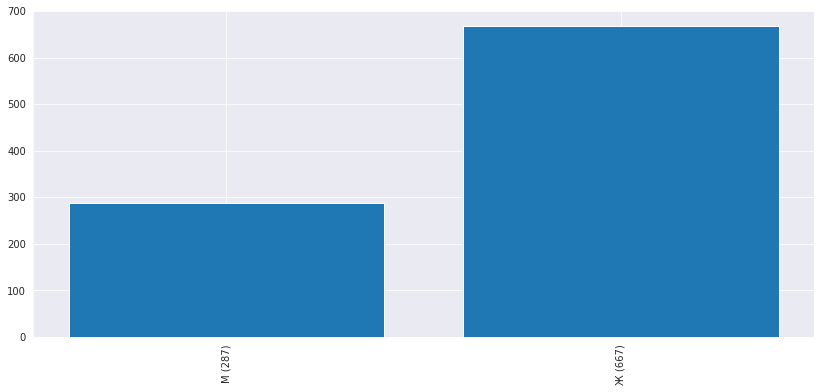

----- Параметр Семья -----


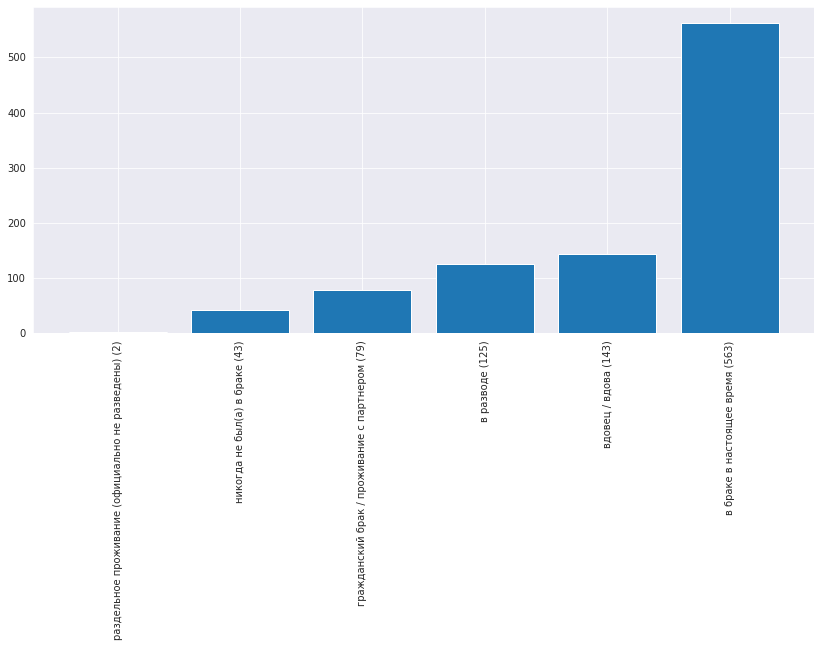

----- Параметр Этнос -----


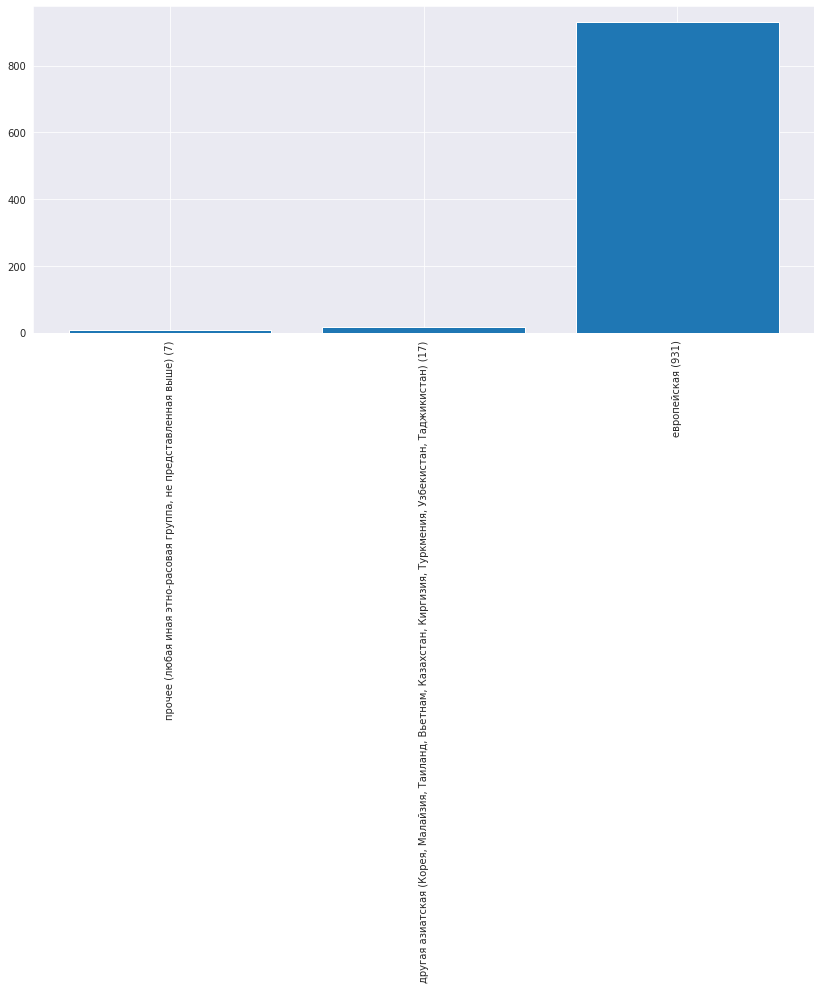

----- Параметр Национальность -----


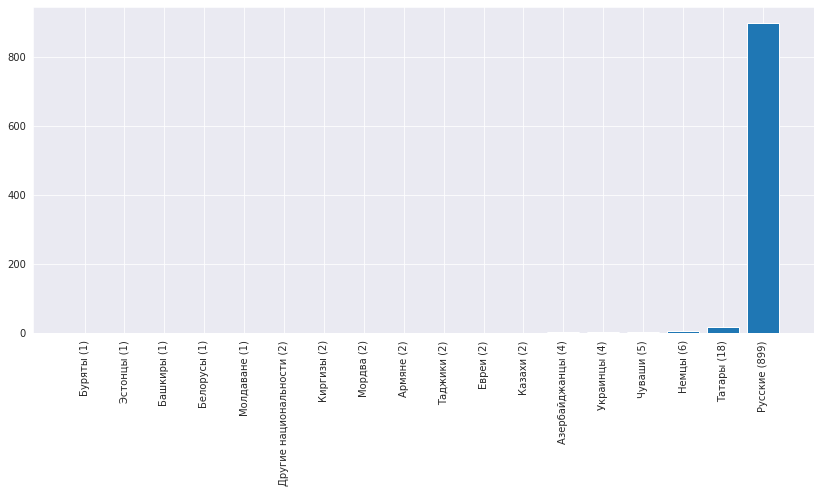

----- Параметр Религия -----


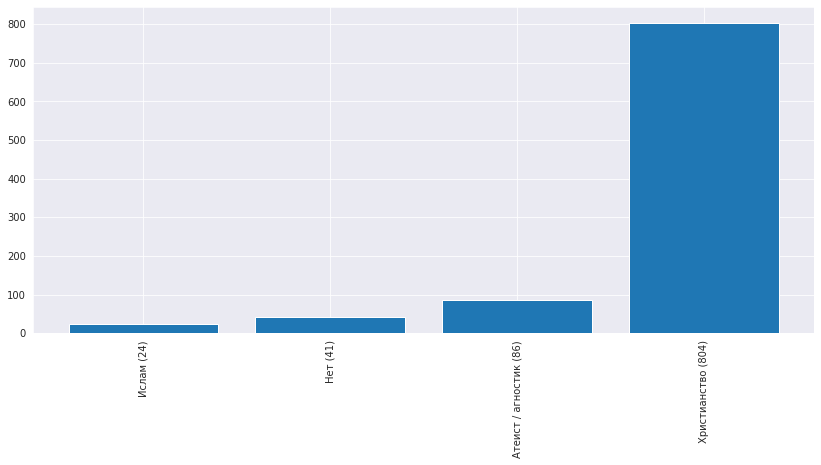

----- Параметр Образование -----


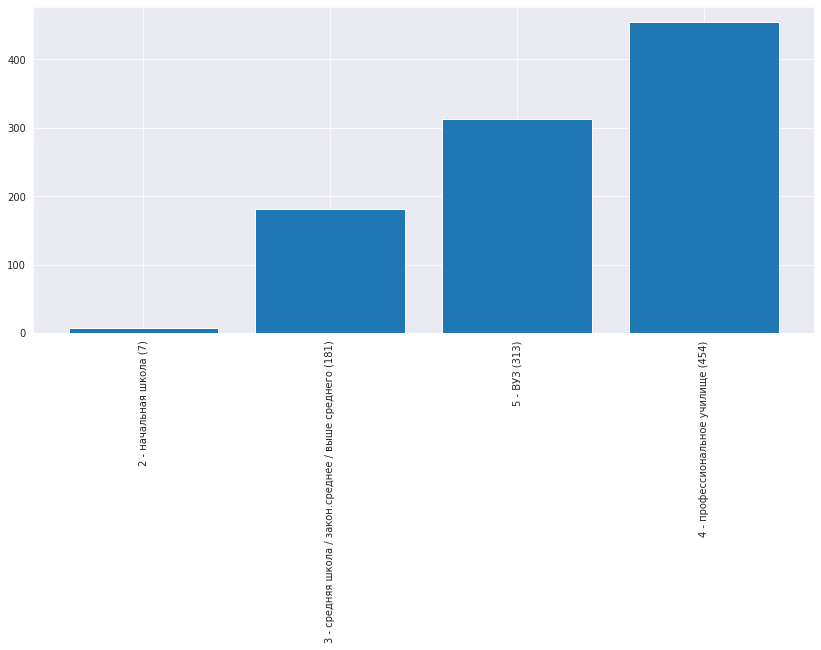

----- Параметр Профессия -----


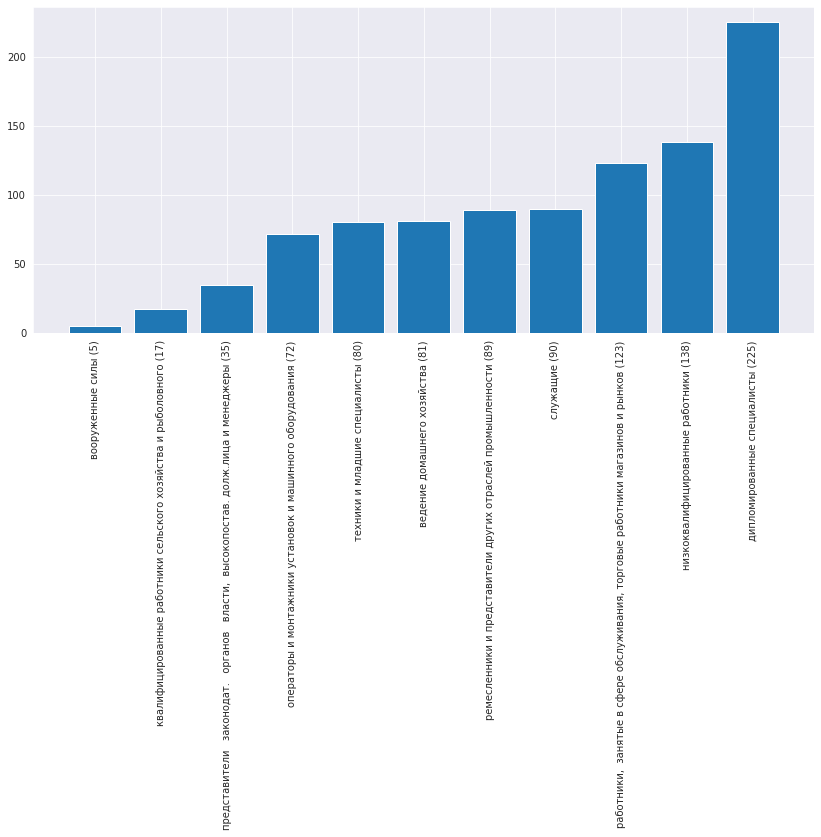

----- Параметр Вы работаете? -----


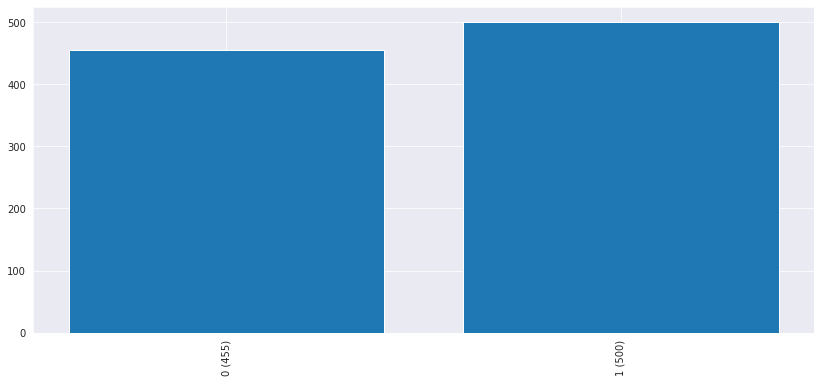

----- Параметр Выход на пенсию -----


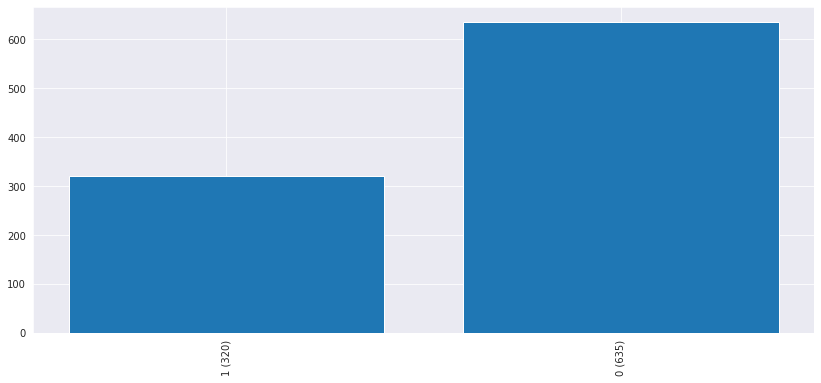

----- Параметр Прекращение работы по болезни -----


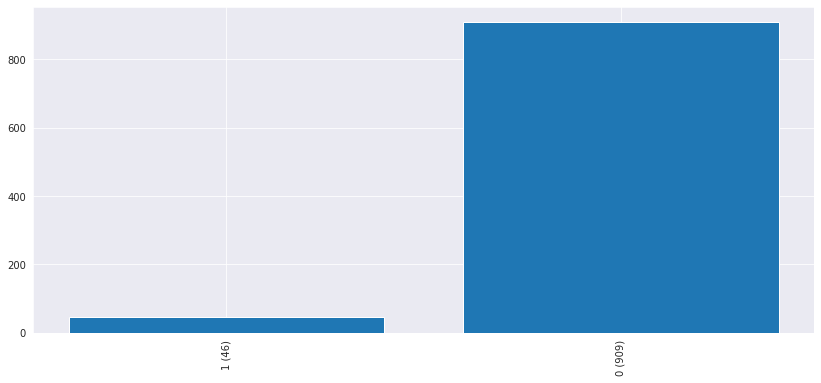

----- Параметр Сахарный диабет -----


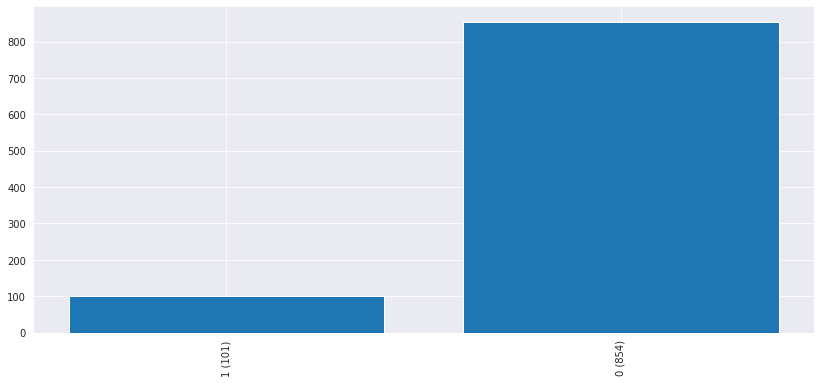

----- Параметр Гепатит -----


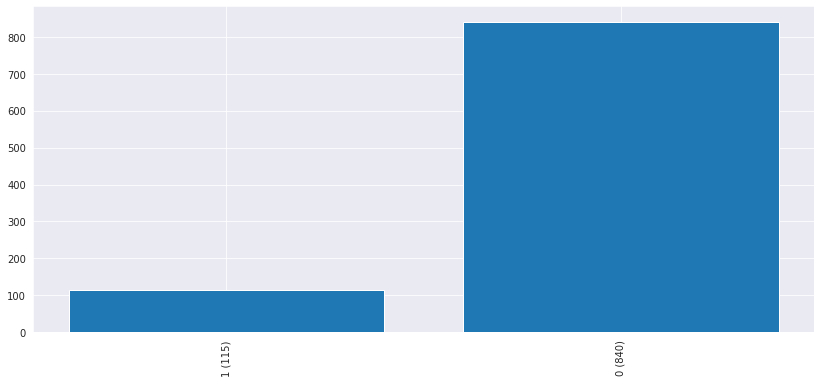

----- Параметр Онкология -----


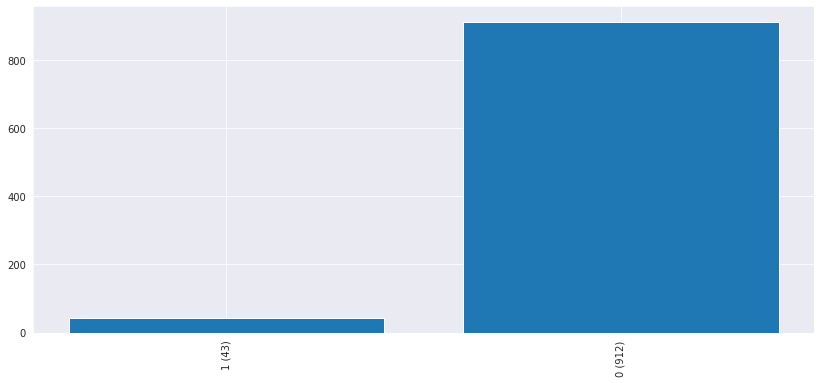

----- Параметр Хроническое заболевание легких -----


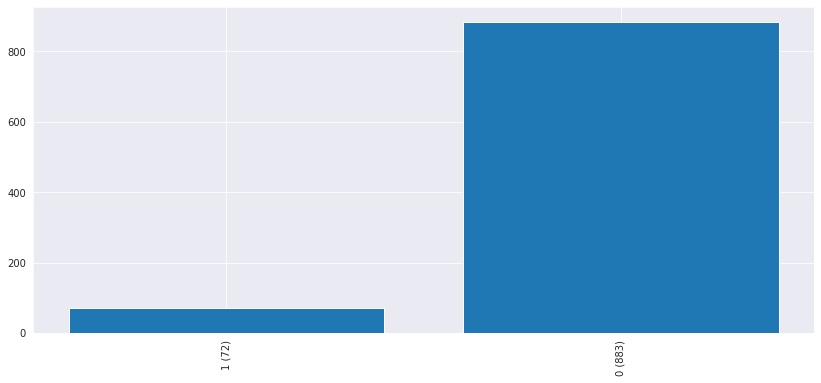

----- Параметр Бронжиальная астма -----


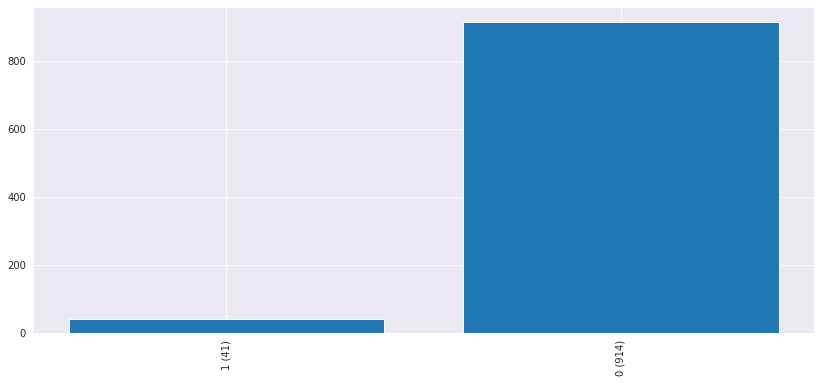

----- Параметр Туберкулез легких  -----


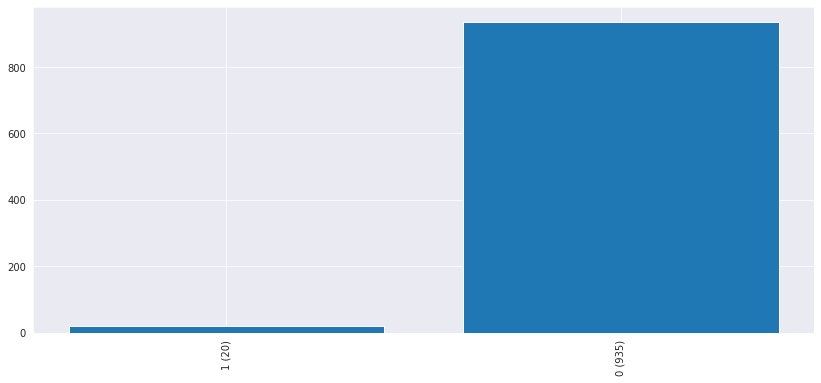

----- Параметр ВИЧ/СПИД -----


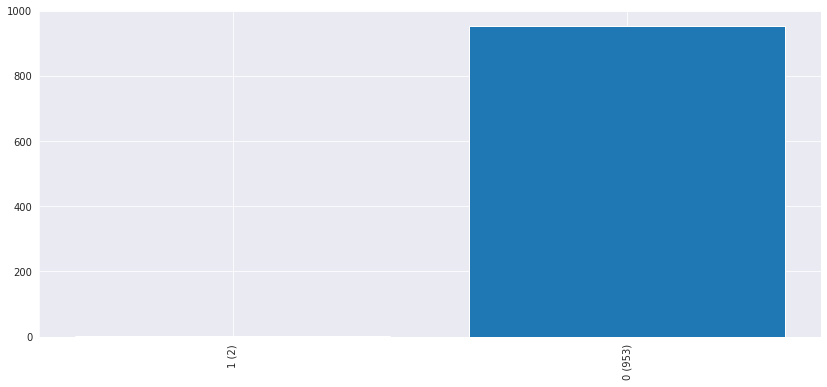

----- Параметр Регулярный прим лекарственных средств -----


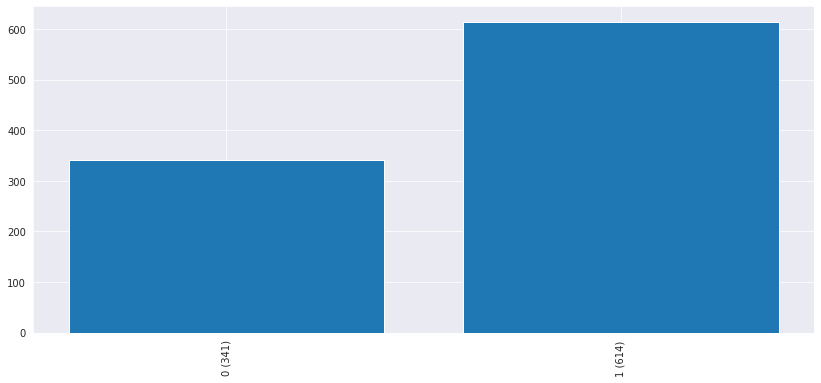

----- Параметр Травмы за год -----


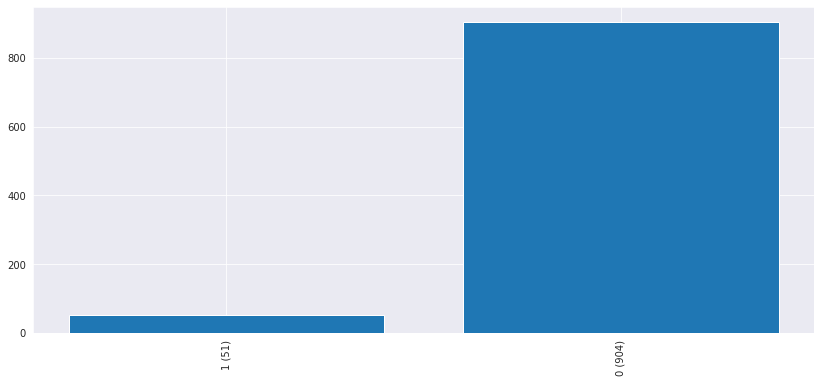

----- Параметр Переломы -----


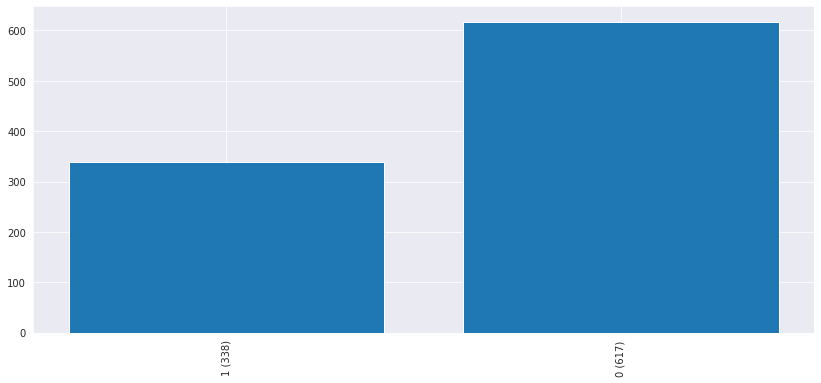

----- Параметр Статус Курения -----


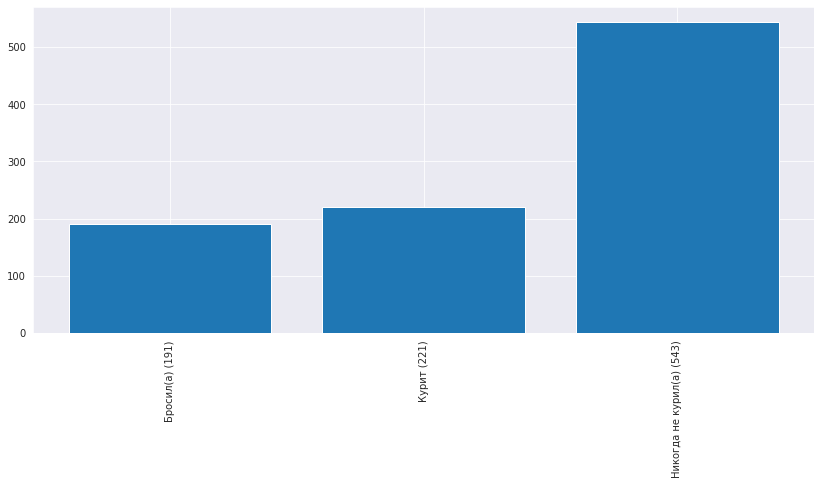

----- Параметр Возраст курения -----


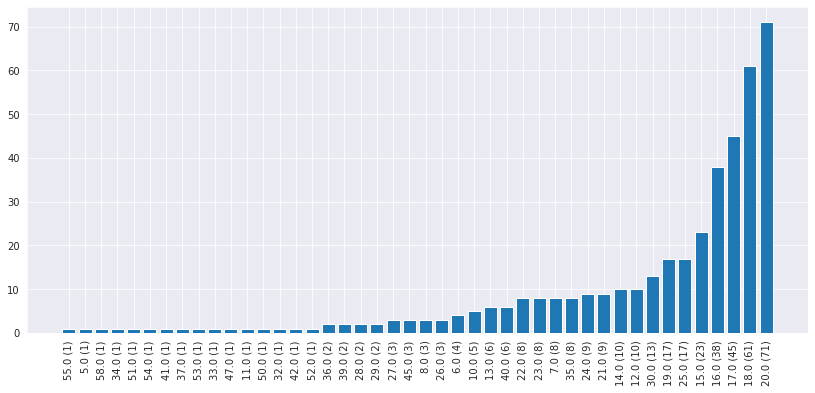

----- Параметр Сигарет в день -----


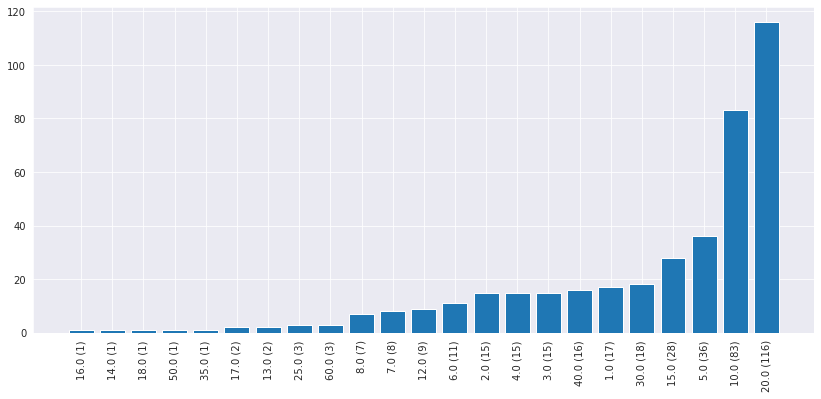

----- Параметр Пассивное курение -----


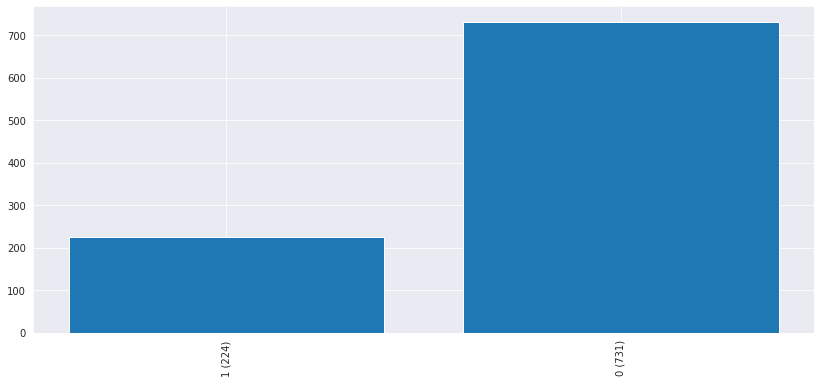

----- Параметр Частота пасс кур -----


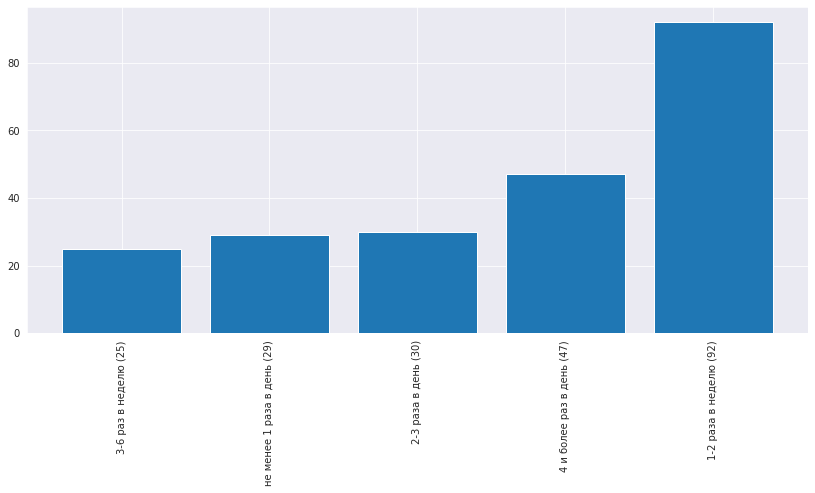

----- Параметр Алкоголь -----


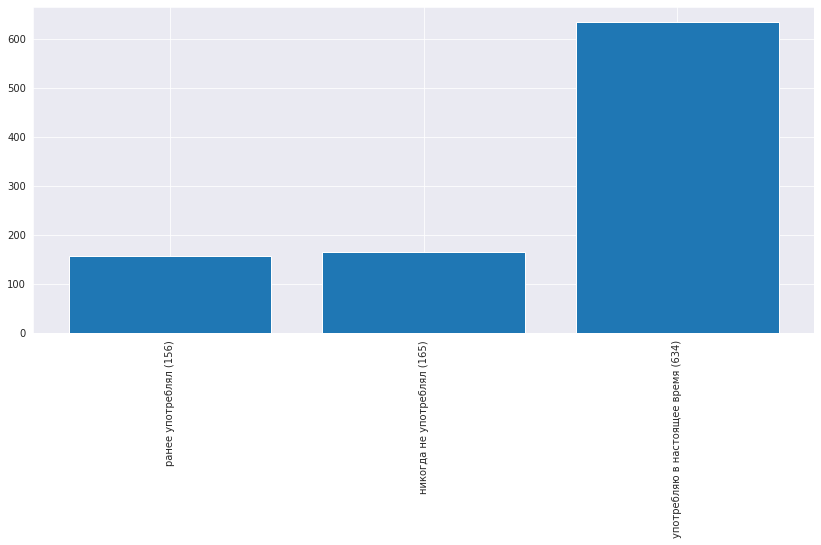

----- Параметр Возраст алког -----


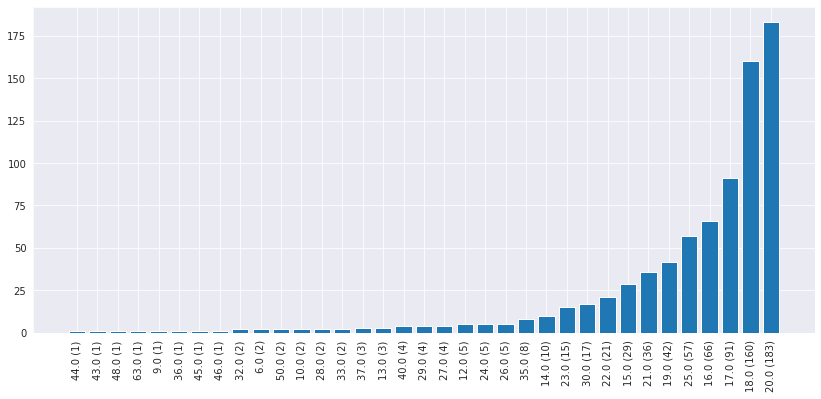

----- Параметр Время засыпания -----


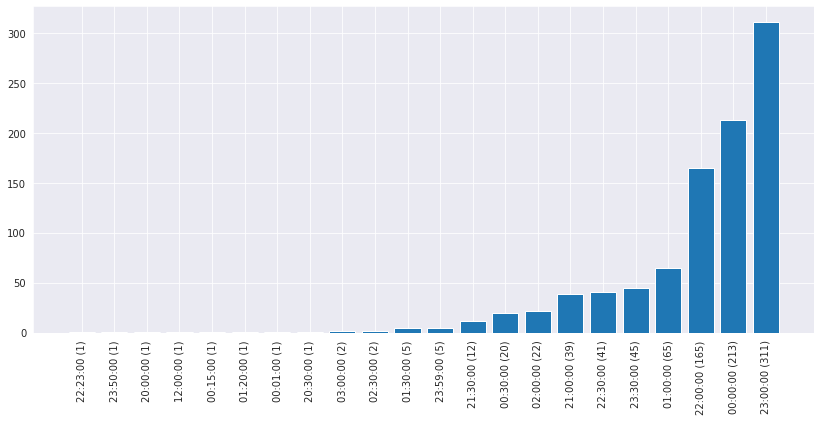

----- Параметр Время пробуждения -----


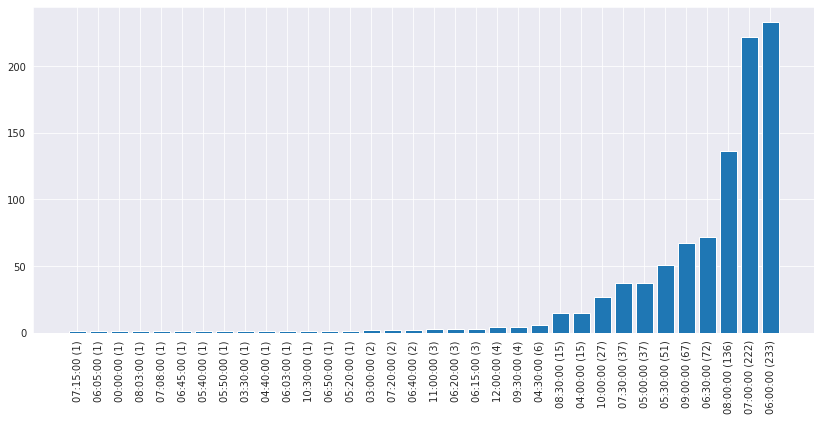

----- Параметр Сон после обеда -----


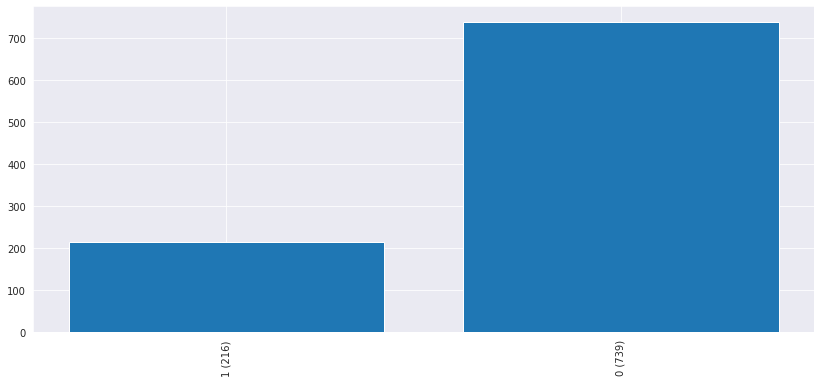

----- Параметр Спорт, клубы -----


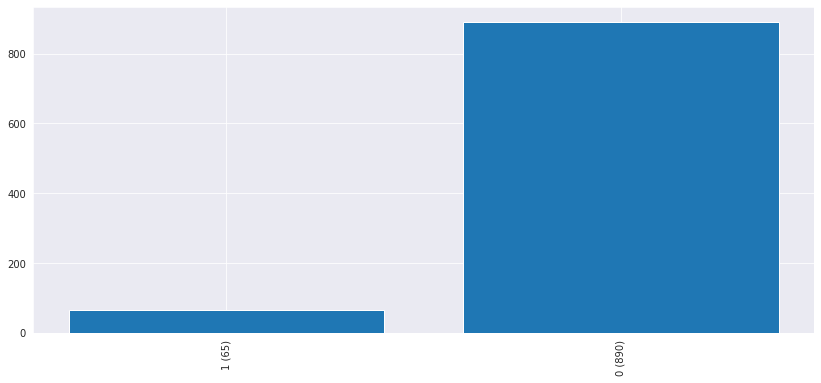

----- Параметр Религия, клубы -----


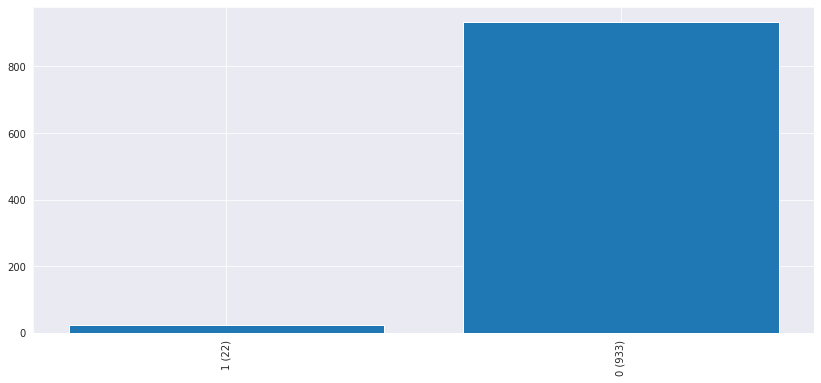

----- Параметр Артериальная гипертензия -----


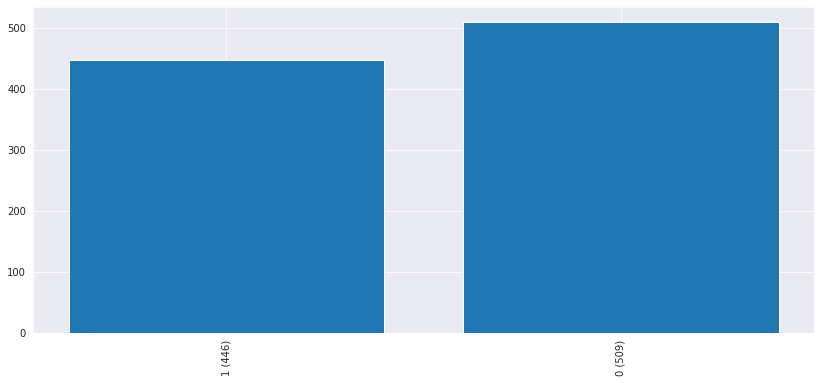

----- Параметр ОНМК -----


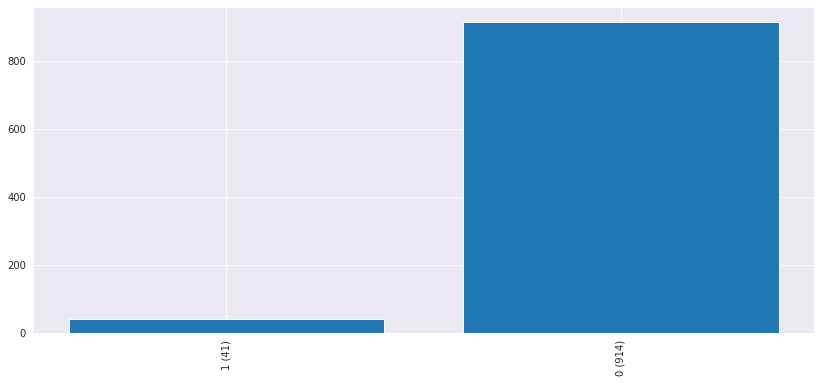

----- Параметр Стенокардия, ИБС, инфаркт миокарда -----


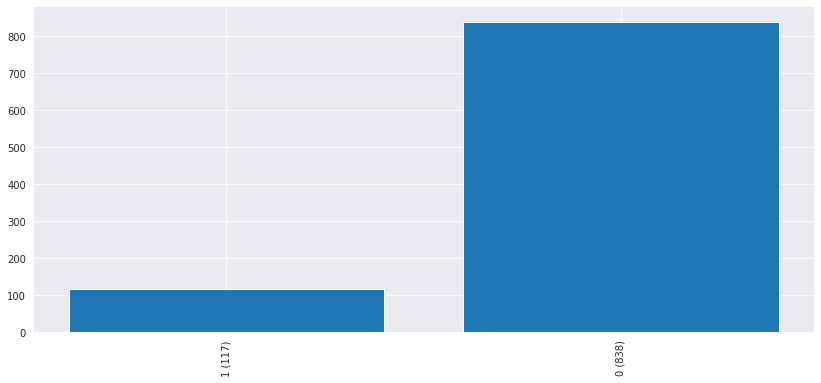

----- Параметр Сердечная недостаточность -----


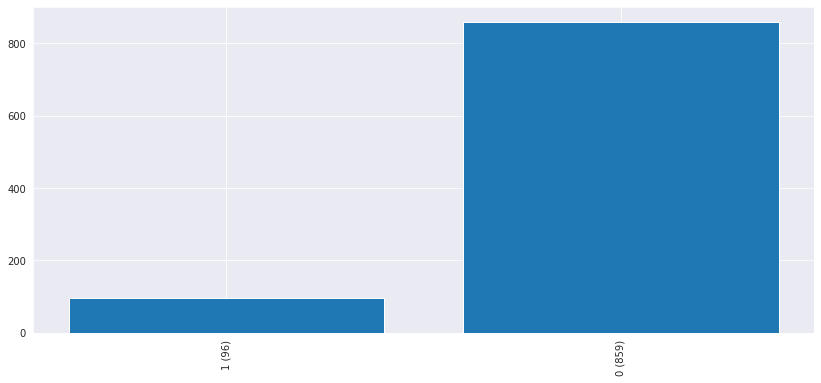

----- Параметр Прочие заболевания сердца -----


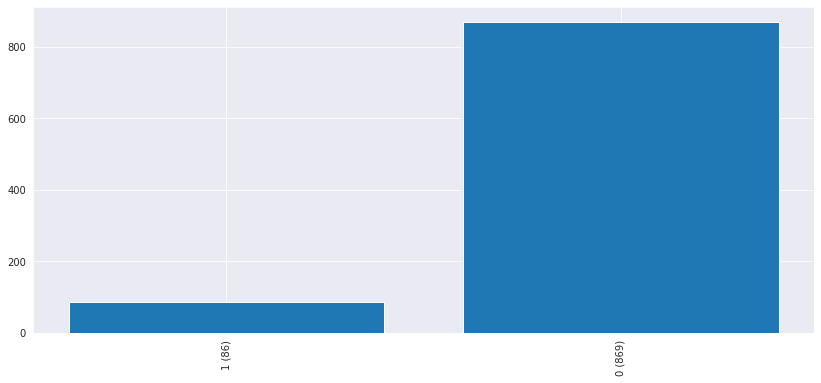

In [ ]:
# Информация о датасете
worker.dataset_info()

In [ ]:
# Оцифровка категориальных признаков
worker.convertToNumeric(["Пол", 'Семья', 'Этнос', 'Национальность', 'Религия', 'Образование', 'Профессия', 'Статус Курения', 'Частота пасс кур', 'Алкоголь', 'Время засыпания', 'Время пробуждения'] )

,Пол,Семья,Этнос,Национальность,Религия,Образование,Профессия,Вы работаете?,Выход на пенсию,Прекращение работы по болезни,...,Время засыпания,Время пробуждения,Сон после обеда,"Спорт, клубы","Религия, клубы",Артериальная гипертензия,ОНМК,"Стенокардия, ИБС, инфаркт миокарда",Сердечная недостаточность,Прочие заболевания сердца
ID,,,,,,,,,,,,,,,,,,,,,
54-102-358-02,2,0,1,12,3,1,4,1,0,0,...,15,11,0,0,0,0,0,0,0,0
54-103-101-01,1,1,1,12,3,3,2,0,0,0,...,0,3,1,0,0,1,1,0,0,0
54-501-026-03,1,0,1,12,3,3,2,0,0,0,...,18,20,0,0,0,0,0,0,0,0
54-501-094-02,2,0,1,12,0,1,4,1,0,0,...,18,20,0,0,0,1,0,0,0,0
54-503-022-01,1,0,1,12,3,1,5,0,0,1,...,18,11,0,0,0,1,0,1,1,0


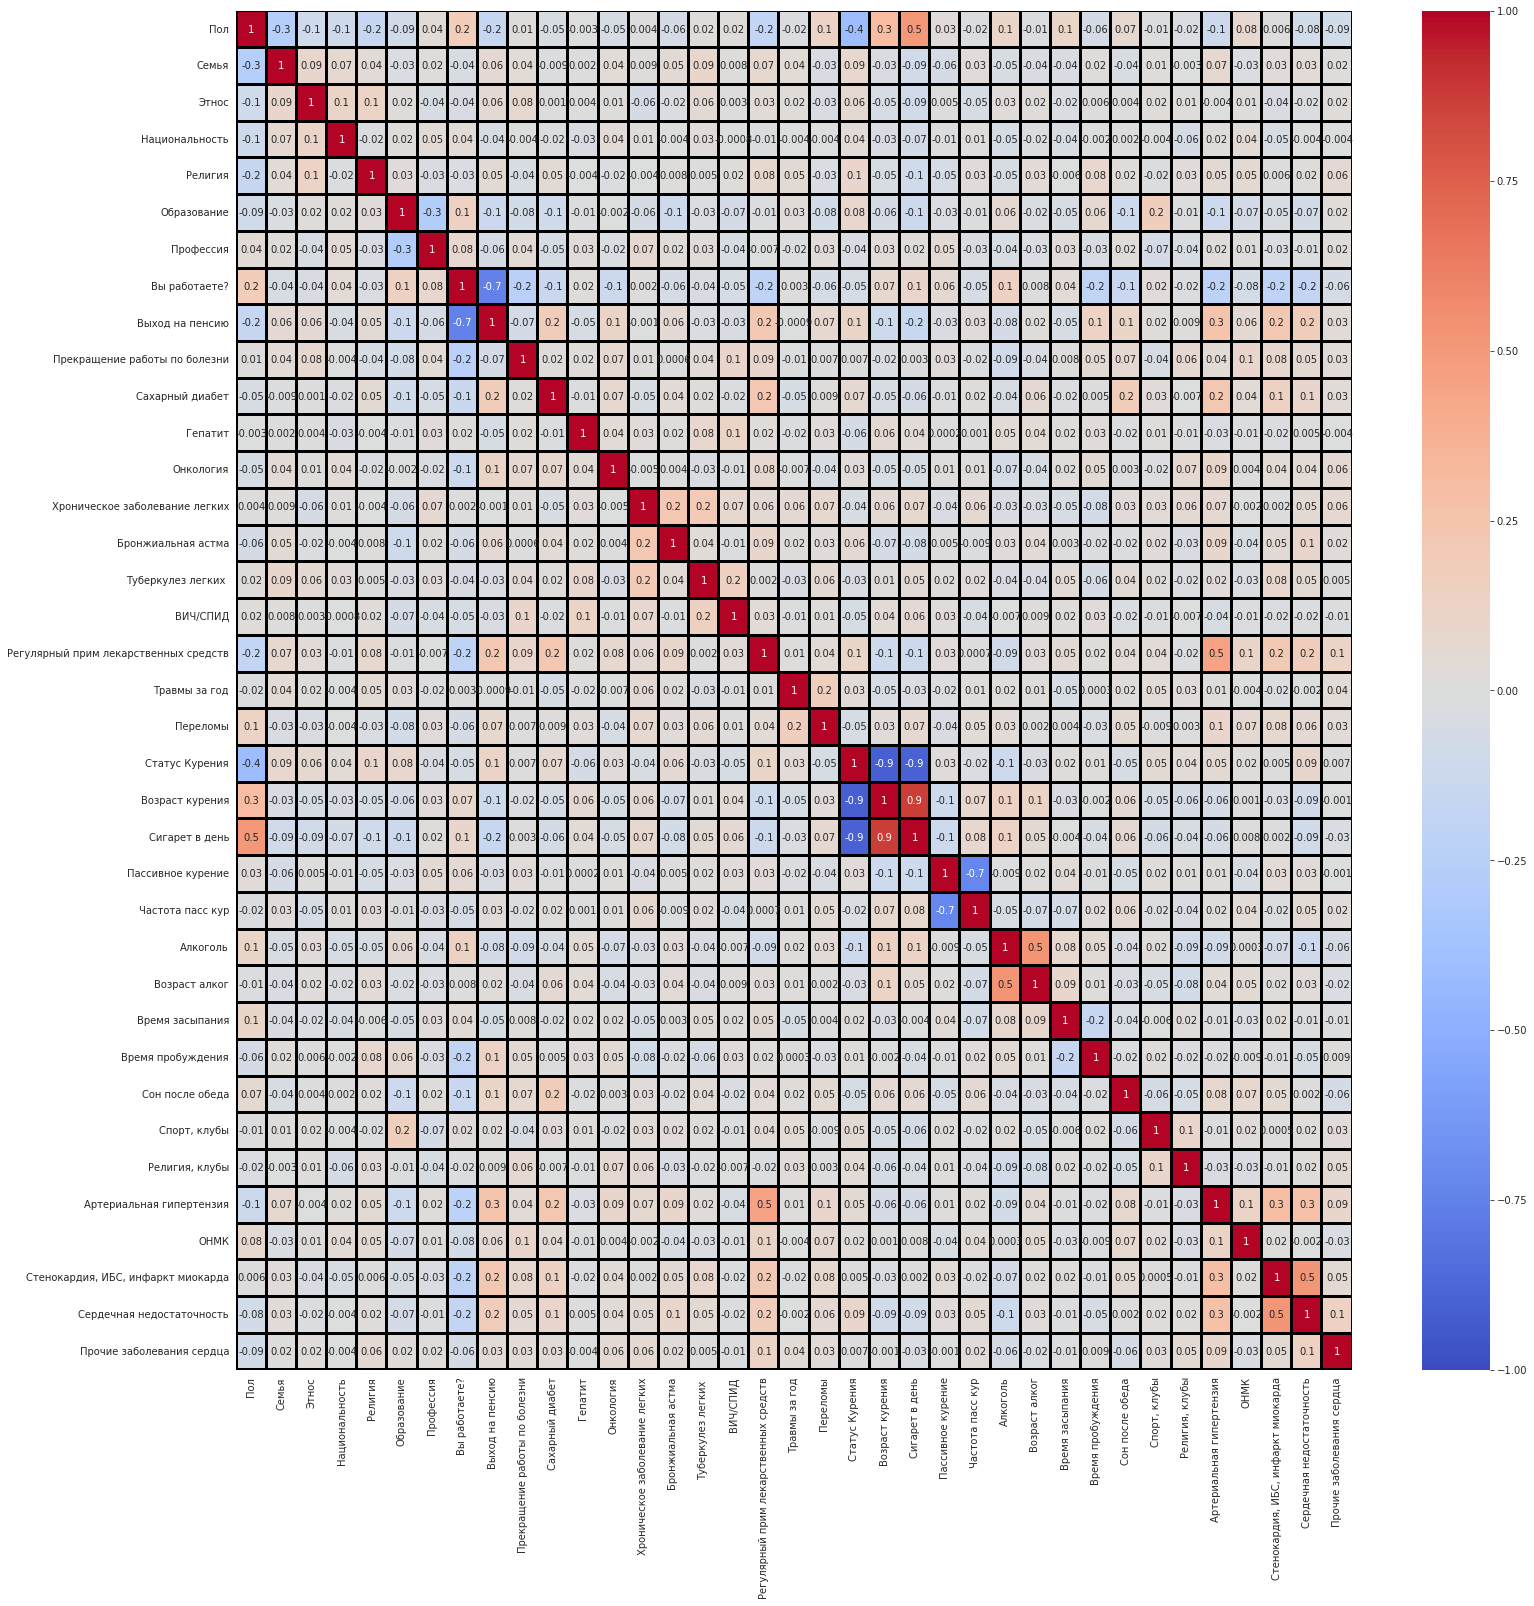

In [ ]:
# Вывод матрицы корреляции
worker.matrix_corr()

In [ ]:
# Создание выборок
worker.create_sets()

Выборки созданы! Размеры:
x_train: (859, 32)
y_train: (859, 5)
x_val: (96, 32)
y_val: (96, 5)


<h1><b> Эксперименты</b></h1>

### **Эксп. №1 (0.61)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))

  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)
  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 1s 12ms/step - loss: 1.6728 - accuracy: 0.5402 - recall: 0.7151 - precision: 0.2001 - val_loss: 0.9694 - val_accuracy: 0.5938 - val_recall: 0.6234 - val_precision: 0.2096
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.7847 - accuracy: 0.7008 - recall: 0.5416 - precision: 0.2706 - val_loss: 0.5197 - val_accuracy: 0.7292 - val_recall: 0.4416 - val_precision: 0.3953
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5662 - accuracy: 0.6764 - recall: 0.3639 - precision: 0.3505 - val_loss: 0.4545 - val_accuracy: 0.7917 - val_recall: 0.3506 - val_precision: 0.4426
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7544 - recall: 0.3131 - precision: 0.3598 - val_loss: 0.4273 - val_accuracy: 0.8438 - val_recall: 0.3247 - val_precision: 0.4630
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.7928 - recall: 0.3

График обучения:


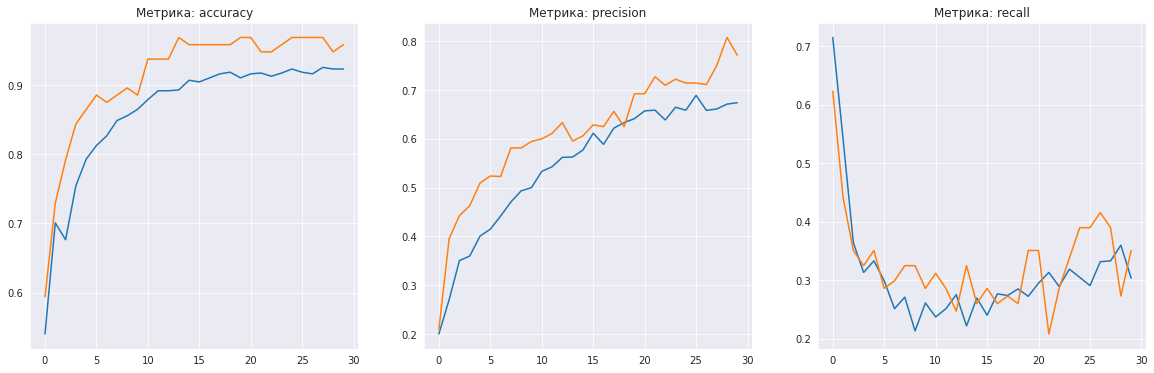

Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.969
Максимальная метрика precision  на обучающей выборке: 0.689
Максимальная метрика precision  на проверочной выборке: 0.808
Максимальная метрика recall на обучающей выборке: 0.715
Максимальная метрика recall на проверочной выборке: 0.623


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.467
Максимальная метрика precision на проверочной выборке: 0.0

Максимальная метрика recall на обучающей выборке: 0.387
Максимальная метрика recall на проверочной выборке: 0.0




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.767
Максимальная метрика precision на проверочной выборке: 0.0

Максимальная метрика recall на обучающей выборке: 0.38
Максимальная метрика recall на проверочной выборке: 0.0




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.466
Максимальная метрика precision на проверочной выборке: 0.0

М

### **Эксп. №2 (добавление BatchNormalization+Dropout) (0.61)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(5, activation='sigmoid'))

  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)
  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 23ms/step - loss: 0.7854 - accuracy: 0.2584 - recall: 0.4288 - precision: 0.1719 - val_loss: 1.4707 - val_accuracy: 0.0521 - val_recall: 0.6623 - val_precision: 0.1266
Epoch 2/30
35/35 [==============================] - 0s 5ms/step - loss: 0.7314 - accuracy: 0.2806 - recall: 0.4528 - precision: 0.1828 - val_loss: 0.9397 - val_accuracy: 0.1146 - val_recall: 0.5974 - val_precision: 0.1353
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.2794 - recall: 0.3865 - precision: 0.1849 - val_loss: 0.7225 - val_accuracy: 0.1875 - val_recall: 0.4935 - val_precision: 0.1704
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.3038 - recall: 0.3709 - precision: 0.2206 - val_loss: 0.6273 - val_accuracy: 0.2396 - val_recall: 0.3896 - val_precision: 0.1935
Epoch 5/30
35/35 [==============================] - 0s 5ms/step - loss: 0.5901 - accuracy: 0.3644 - recall: 0.3

График обучения:


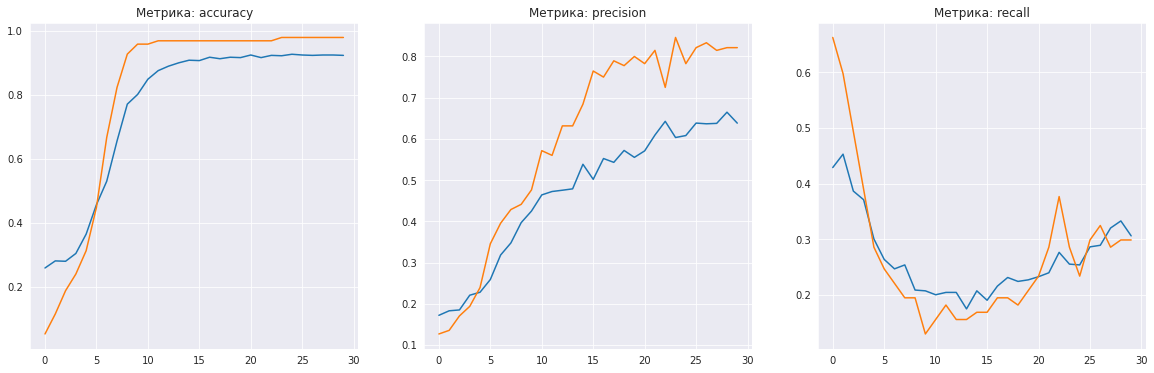

Максимальная точность на обучающей выборке: 0.927
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.665
Максимальная метрика precision  на проверочной выборке: 0.846
Максимальная метрика recall на обучающей выборке: 0.453
Максимальная метрика recall на проверочной выборке: 0.662


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.476
Максимальная метрика precision на проверочной выборке: 0.49

Максимальная метрика recall на обучающей выборке: 0.522
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.473
Максимальная метрика precision на проверочной выборке: 0.49

Максимальная метрика recall на обучающей выборке: 0.345
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.656
Максимальная метрика precision на проверочной выборке: 0

### **Эксп. №3 (добавление Dense) (0.623)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(16, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.6590 - accuracy: 0.1944 - recall: 0.3053 - precision: 0.1934 - val_loss: 0.6190 - val_accuracy: 0.0208 - val_recall: 0.0130 - val_precision: 0.0303
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.5285 - recall: 0.1975 - precision: 0.2911 - val_loss: 0.4490 - val_accuracy: 0.5521 - val_recall: 0.0130 - val_precision: 0.2500
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7893 - recall: 0.1749 - precision: 0.3987 - val_loss: 0.4056 - val_accuracy: 0.9792 - val_recall: 0.1039 - val_precision: 0.7273
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4073 - accuracy: 0.8847 - recall: 0.1721 - precision: 0.4729 - val_loss: 0.3892 - val_accuracy: 0.9792 - val_recall: 0.1818 - val_precision: 0.7368
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3934 - accuracy: 0.9104 - recall: 0.1

График обучения:


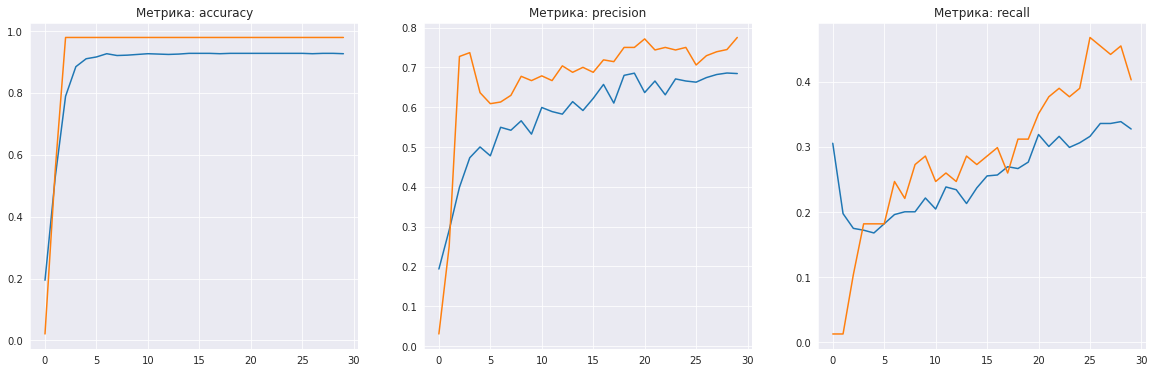

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.686
Максимальная метрика precision  на проверочной выборке: 0.775
Максимальная метрика recall на обучающей выборке: 0.339
Максимальная метрика recall на проверочной выборке: 0.468


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.703
Максимальная метрика precision на проверочной выборке: 0.85

Максимальная метрика recall на обучающей выборке: 0.444
Максимальная метрика recall на проверочной выборке: 0.61




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.725
Максимальная метрика precision на проверочной выборке: 0.789

Максимальная метрика recall на обучающей выборке: 0.408
Максимальная метрика recall на проверочной выборке: 0.506




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.706
Максимальная метрика precision на проверочной выборке:

### **Эксп. №4 (Увеличение нейронов в первом Dense) (0.636)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 14ms/step - loss: 0.6737 - accuracy: 0.1676 - recall: 0.2583 - precision: 0.1545 - val_loss: 0.5208 - val_accuracy: 0.4375 - val_recall: 0.2727 - val_precision: 0.2530
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.6298 - recall: 0.1890 - precision: 0.3976 - val_loss: 0.3959 - val_accuracy: 0.9167 - val_recall: 0.2987 - val_precision: 0.6053
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4007 - accuracy: 0.8382 - recall: 0.2299 - precision: 0.5525 - val_loss: 0.3730 - val_accuracy: 0.9792 - val_recall: 0.3506 - val_precision: 0.6923
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8789 - recall: 0.2468 - precision: 0.5932 - val_loss: 0.3645 - val_accuracy: 0.9792 - val_recall: 0.3506 - val_precision: 0.6750
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.3698 - accuracy: 0.8836 - recall: 0.2

График обучения:


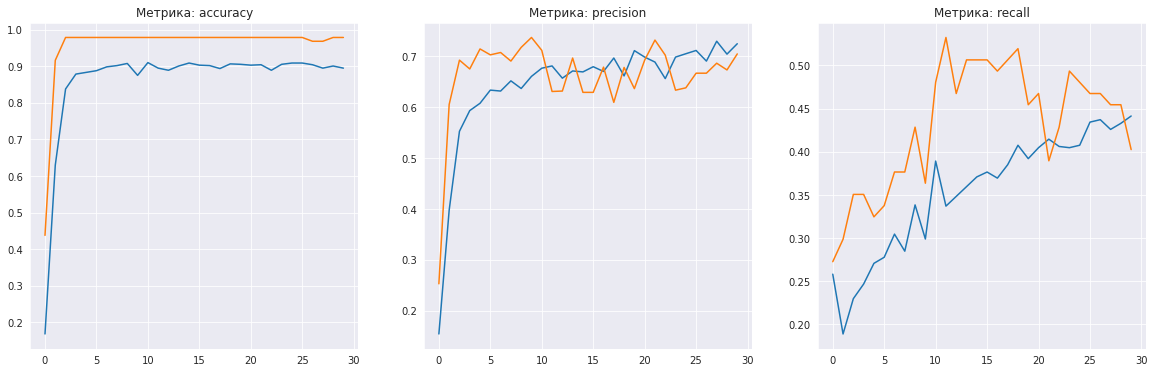

Максимальная точность на обучающей выборке: 0.91
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.729
Максимальная метрика precision  на проверочной выборке: 0.737
Максимальная метрика recall на обучающей выборке: 0.441
Максимальная метрика recall на проверочной выборке: 0.532


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.919
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.763
Максимальная метрика precision на проверочной выборке: 0.781

Максимальная метрика recall на обучающей выборке: 0.496
Максимальная метрика recall на проверочной выборке: 0.468




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.922
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.759
Максимальная метрика precision на проверочной выборке: 0.88

Максимальная метрика recall на обучающей выборке: 0.526
Максимальная метрика recall на проверочной выборке: 0.532




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.922
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.74
Максимальная метрика precision на проверочной выборке:

### **Эксп. №5 (Добавление Dense) (0.753)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.7181 - accuracy: 0.2119 - recall: 0.4440 - precision: 0.1788 - val_loss: 0.6689 - val_accuracy: 0.5417 - val_recall: 0.6234 - val_precision: 0.2182
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.3620 - recall: 0.4443 - precision: 0.2191 - val_loss: 0.6069 - val_accuracy: 0.4688 - val_recall: 0.5844 - val_precision: 0.2632
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.5076 - recall: 0.4090 - precision: 0.3142 - val_loss: 0.4877 - val_accuracy: 0.5104 - val_recall: 0.4156 - val_precision: 0.3404
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.6438 - recall: 0.3032 - precision: 0.3853 - val_loss: 0.4159 - val_accuracy: 0.8542 - val_recall: 0.2987 - val_precision: 0.5750
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8033 - recall: 0.2

График обучения:


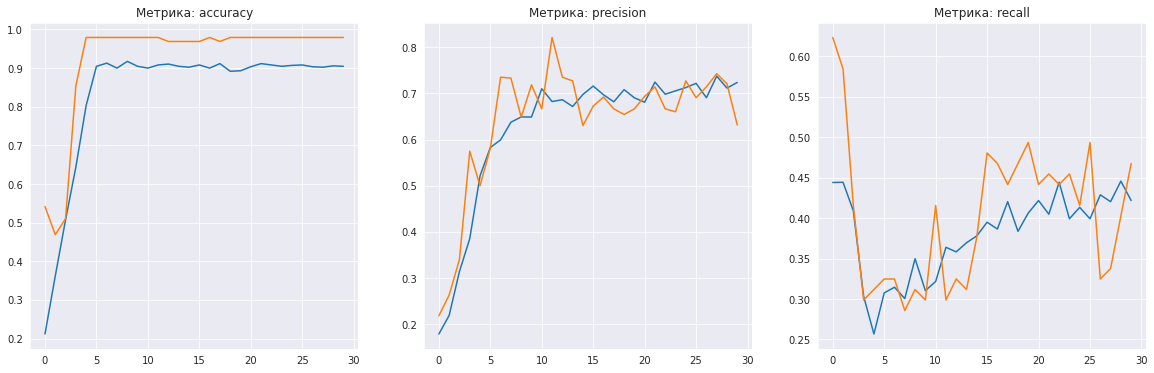

Максимальная точность на обучающей выборке: 0.917
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.738
Максимальная метрика precision  на проверочной выборке: 0.821
Максимальная метрика recall на обучающей выборке: 0.446
Максимальная метрика recall на проверочной выборке: 0.623


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.758
Максимальная метрика precision на проверочной выборке: 0.788

Максимальная метрика recall на обучающей выборке: 0.491
Максимальная метрика recall на проверочной выборке: 0.494




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.747
Максимальная метрика precision на проверочной выборке: 0.812

Максимальная метрика recall на обучающей выборке: 0.489
Максимальная метрика recall на проверочной выборке: 0.481




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.927
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.777
Максимальная метрика precision на проверочной выборк

### **Эксп. №6 (Замена relu на sigmoid) (0.792)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 13ms/step - loss: 0.6033 - accuracy: 0.0664 - recall: 0.1438 - precision: 0.1462 - val_loss: 0.5415 - val_accuracy: 0.9062 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.7357 - recall: 0.0409 - precision: 0.4143 - val_loss: 0.4697 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.9208 - recall: 0.0719 - precision: 0.6071 - val_loss: 0.4227 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4240 - accuracy: 0.9278 - recall: 0.0691 - precision: 0.6712 - val_loss: 0.3965 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/30
35/35 [==============================] - 0s 3ms/step - loss: 0.4031 

График обучения:


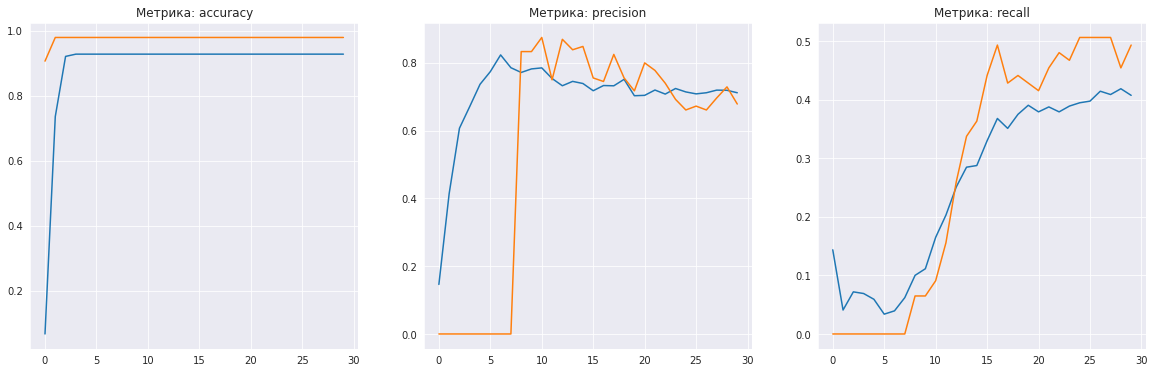

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.824
Максимальная метрика precision  на проверочной выборке: 0.875
Максимальная метрика recall на обучающей выборке: 0.419
Максимальная метрика recall на проверочной выборке: 0.506


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.692
Максимальная метрика precision на проверочной выборке: 0.889

Максимальная метрика recall на обучающей выборке: 0.477
Максимальная метрика recall на проверочной выборке: 0.74




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.692
Максимальная метрика precision на проверочной выборке: 0.821

Максимальная метрика recall на обучающей выборке: 0.5
Максимальная метрика recall на проверочной выборке: 0.506




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.925
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.696
Максимальная метрика precision на проверочной выборке: 

### **Эксп. №7 (Замена binary_crossentropy на categorical_crossentropy) (0.805)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 1s 14ms/step - loss: 1.5458 - accuracy: 0.0116 - recall: 0.0954 - precision: 0.1761 - val_loss: 1.3964 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/30
35/35 [==============================] - 0s 3ms/step - loss: 1.3557 - accuracy: 0.0431 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.2392 - val_accuracy: 0.4583 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/30
35/35 [==============================] - 0s 3ms/step - loss: 1.2290 - accuracy: 0.7264 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.1300 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 1.1489 - accuracy: 0.9255 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.0567 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/30
35/35 [==============================] -

График обучения:


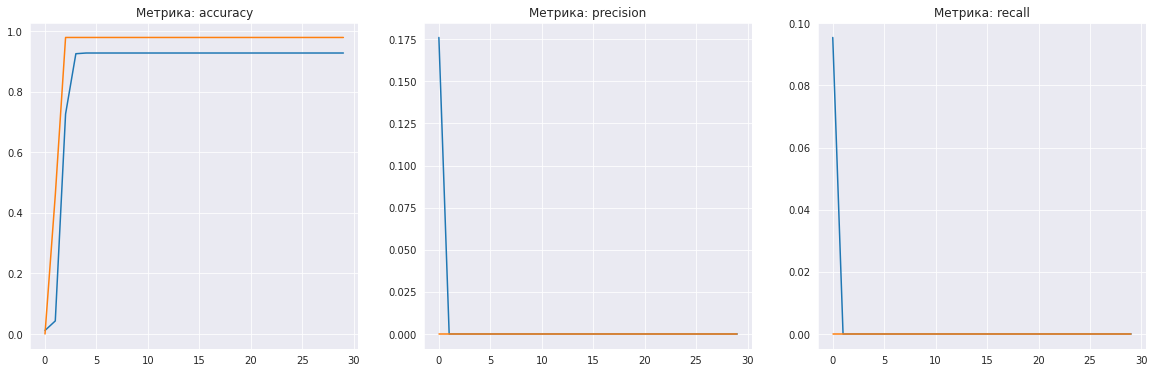

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.176
Максимальная метрика precision  на проверочной выборке: 0.0
Максимальная метрика recall на обучающей выборке: 0.095
Максимальная метрика recall на проверочной выборке: 0.0


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.923
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.714
Максимальная метрика precision на проверочной выборке: 0.829

Максимальная метрика recall на обучающей выборке: 0.389
Максимальная метрика recall на проверочной выборке: 0.455




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.921
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.713
Максимальная метрика precision на проверочной выборке: 0.794

Максимальная метрика recall на обучающей выборке: 0.382
Максимальная метрика recall на проверочной выборке: 0.494




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.729
Максимальная метрика precision на проверочной выборк

### **Эксп. №8 (Увеличение шага обучения до 0.014) (0.818)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=30, 
                           verbose=1)

Epoch 1/30
35/35 [==============================] - 2s 14ms/step - loss: 1.3403 - accuracy: 0.3097 - recall: 0.3117 - precision: 0.1920 - val_loss: 1.0996 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/30
35/35 [==============================] - 0s 4ms/step - loss: 1.1232 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4524 - val_loss: 0.9976 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0735 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9759 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 4/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0612 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9705 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 1.0560 - accuracy: 0.9278 - recall: 0.5

График обучения:


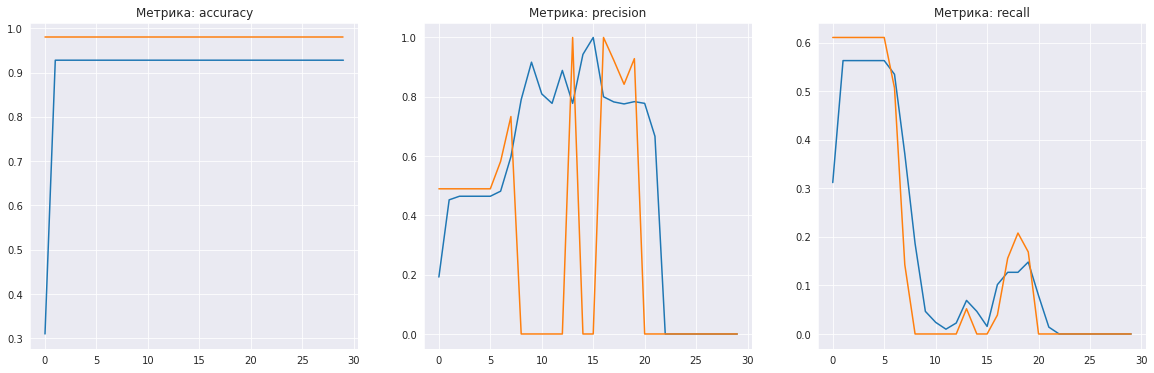

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 1.0
Максимальная метрика precision  на проверочной выборке: 1.0
Максимальная метрика recall на обучающей выборке: 0.563
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 1.0
Максимальная метрика precision на проверочной выборке: 0.875

Максимальная метрика recall на обучающей выборке: 0.44
Максимальная метрика recall на проверочной выборке: 0.545




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.773
Максимальная метрика precision на проверочной выборке: 1.0

Максимальная метрика recall на обучающей выборке: 0.444
Максимальная метрика recall на проверочной выборке: 0.532




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 1.0
Максимальная метрика precision на проверочной выборке: 1.0


### **Эксп. №9 (Добавление еще одного полносвязного слоя) (0.857)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(128, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=100, 
                           verbose=1)

Epoch 1/100
35/35 [==============================] - 2s 14ms/step - loss: 1.1443 - accuracy: 0.7579 - recall: 0.6514 - precision: 0.2575 - val_loss: 0.9554 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 1.0515 - accuracy: 0.9278 - recall: 0.5628 - precision: 0.4645 - val_loss: 0.9697 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0567 - accuracy: 0.9278 - recall: 0.2003 - precision: 0.6228 - val_loss: 0.9519 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0484 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9889 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 1.0598 - a

График обучения:


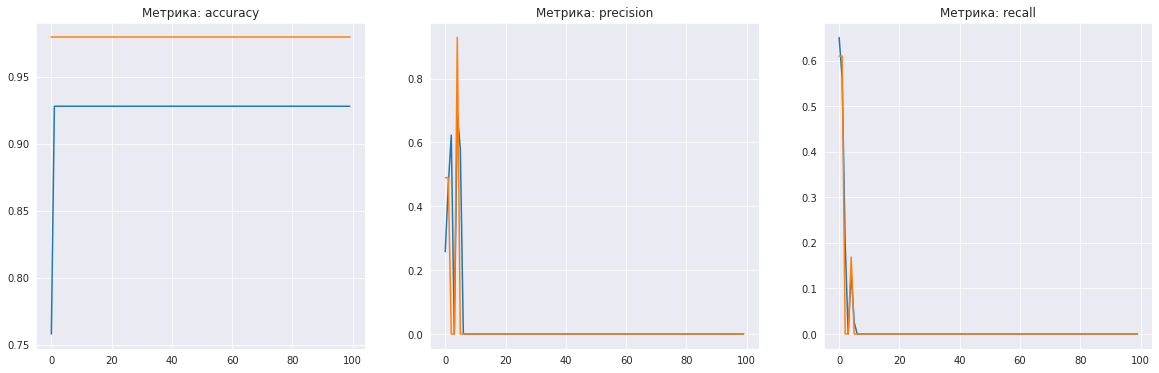

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.691
Максимальная метрика precision  на проверочной выборке: 0.929
Максимальная метрика recall на обучающей выборке: 0.651
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.789
Максимальная метрика precision на проверочной выборке: 1.0

Максимальная метрика recall на обучающей выборке: 0.628
Максимальная метрика recall на проверочной выборке: 0.675




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.738
Максимальная метрика precision на проверочной выборке: 0.875

Максимальная метрика recall на обучающей выборке: 0.568
Максимальная метрика recall на проверочной выборке: 0.662




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.759
Максимальная метрика precision на проверочной выборке:

### **Эксп. №10 (Усиление первого полносвязного слоя) (0.883)**

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(512, input_dim=32, activation='sigmoid'))
  model.add(BatchNormalization())
  model.add(Dropout(.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(10, activation='sigmoid'))
  model.add(Dense(8, activation='sigmoid'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer=Adam(0.014), loss='categorical_crossentropy', metrics=metrics)

  # Компиляция модели
  return model

model = create_model()

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных

store_learning = model.fit(worker.x_train,
                           worker.y_train,
                           validation_data=(worker.x_val, worker.y_val),
                           shuffle=True,
                           batch_size=25,
                           epochs=100, 
                           verbose=1)

Epoch 1/100
35/35 [==============================] - 2s 15ms/step - loss: 1.1266 - accuracy: 0.8440 - recall: 0.5674 - precision: 0.3193 - val_loss: 0.9632 - val_accuracy: 0.9792 - val_recall: 0.6104 - val_precision: 0.4896
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0514 - accuracy: 0.9278 - recall: 0.3625 - precision: 0.4525 - val_loss: 0.9541 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0546 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9532 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 1.0582 - accuracy: 0.9278 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.9618 - val_accuracy: 0.9792 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - 

График обучения:


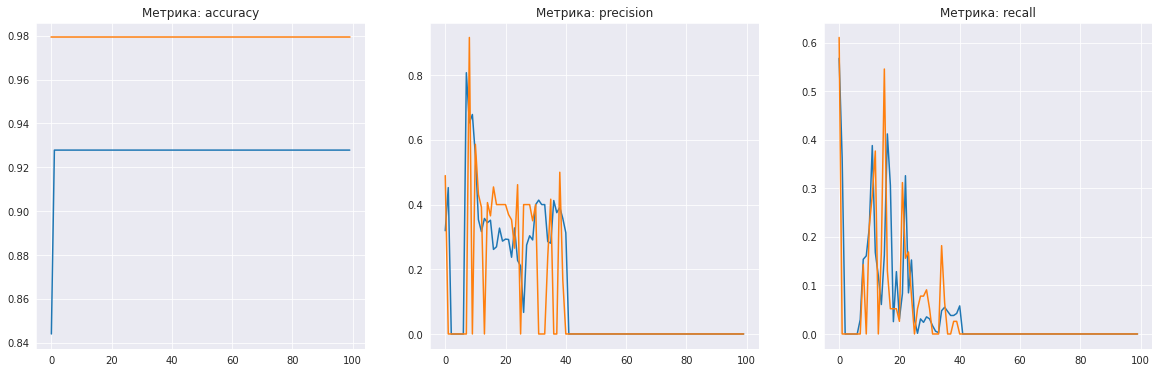

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.808
Максимальная метрика precision  на проверочной выборке: 0.917
Максимальная метрика recall на обучающей выборке: 0.567
Максимальная метрика recall на проверочной выборке: 0.61


In [ ]:
worker.show_learning_information(store_learning)

**Несколько запусков**

In [ ]:
worker.train_model(
    funcModel=create_model,
    count=10)

Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.642
Максимальная метрика precision на проверочной выборке: 0.78

Максимальная метрика recall на обучающей выборке: 0.718
Максимальная метрика recall на проверочной выборке: 0.701




Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.421
Максимальная метрика precision на проверочной выборке: 0.471

Максимальная метрика recall на обучающей выборке: 0.898
Максимальная метрика recall на проверочной выборке: 0.883




Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979

Максимальная метрика precision на обучающей выборке: 0.697
Максимальная метрика precision на проверочной выборке

# **Генетика**

<h3>Параметры генетики:</h3>
<ul>
<li> Длина бота: <b>51</b> <h5>(19-параметры нейронной сети, 32-параметры исходной таблицы)</h5></i>
<li> Размер популяции: <b>30</b>
<li> Количество выживших: <b>15</b>
<li> Количество эпох: <b>100</b>
<li> Коэффициент мутации: 

<b>0.5</b> - с 0 по 10 эпоху

<b>0.4</b> - с 10 по 20 эпоху

<b>0.3</b> - с 20 по 40 эпоху

<b>0.2</b> - с 40 по 70 эпоху

<b>0.1</b> - с 70 по 100 эпоху
</ul>

**Тест №1 (0.909)**

Выбранные параметры
   Пол
   Семья
   Этнос
   Национальность
   Религия
   Образование
   Профессия
   Вы работаете?
   Выход на пенсию
   Прекращение работы по болезни
   Сахарный диабет
   Гепатит
   Онкология
   Хроническое заболевание легких
   Бронжиальная астма
   Туберкулез легких 
   ВИЧ/СПИД
   Регулярный прим лекарственных средств
   Травмы за год
   Переломы
   Статус Курения
   Возраст курения
   Сигарет в день
   Пассивное курение
   Частота пасс кур
   Алкоголь
   Возраст алког
   Время засыпания
   Время пробуждения
   Сон после обеда
   Спорт, клубы
   Религия, клубы

Структура модели
  model = Sequential()
  model.add(Dense(4, activation="elu", input_dim=12))
  model.add(BatchNormalization())
  model.add(Dense(16, activation="tanh"))
  model.add(Dense(5, activation="sigmoid"))

Обучение модели
График обучения:


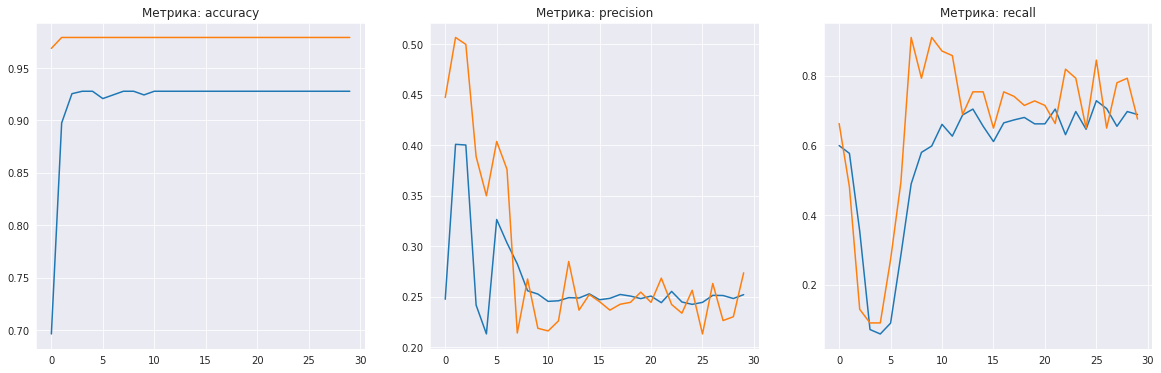

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.401
Максимальная метрика precision  на проверочной выборке: 0.507
Максимальная метрика recall на обучающей выборке: 0.728
Максимальная метрика recall на проверочной выборке: 0.909


In [ ]:
bot = [0, 2, 2, 0, 0.5, 0, 9, 0, 1, 0.5, 0, 2, 0, 0, 0.1, 4, 4, 1, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
worker.create_net_from_bot(bot)

**Тест №2 (0.961)**

Выбранные параметры
   Пол
   Семья
   Этнос
   Национальность
   Религия
   Образование
   Профессия
   Вы работаете?
   Выход на пенсию
   Прекращение работы по болезни
   Сахарный диабет
   Гепатит
   Онкология
   Хроническое заболевание легких
   Бронжиальная астма
   Туберкулез легких 
   ВИЧ/СПИД
   Регулярный прим лекарственных средств
   Травмы за год
   Переломы
   Статус Курения
   Возраст курения
   Сигарет в день
   Пассивное курение
   Частота пасс кур
   Алкоголь
   Возраст алког
   Время засыпания
   Время пробуждения
   Сон после обеда
   Спорт, клубы
   Религия, клубы

Структура модели
  model = Sequential()
  model.add(BatchNormalization(input_dim=14))
  model.add(Dense(512, activation="relu"))
  model.add(Dense(128, activation="linear"))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation="linear"))
  model.add(BatchNormalization())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(5, activation="sigmoid"))

Обучение модели
График обучения:


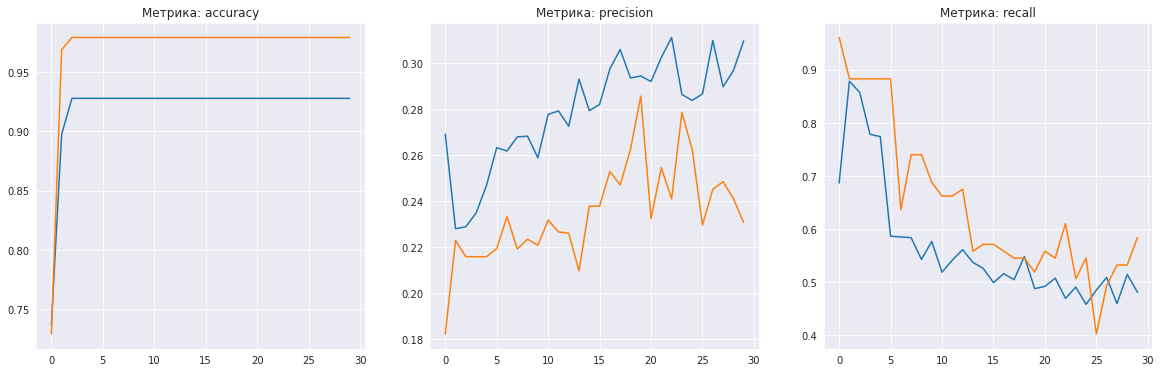

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.311
Максимальная метрика precision  на проверочной выборке: 0.286
Максимальная метрика recall на обучающей выборке: 0.879
Максимальная метрика recall на проверочной выборке: 0.961


In [ ]:
bot = [1, 9, 1, 0, 0.1, 1, 7, 0, 1, 0.2, 1, 6, 0, 0, 0.2, 6, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
worker.create_net_from_bot(bot)

**Тест №3 (0.974)**

Выбранные параметры
   Пол
   Семья
   Этнос
   Национальность
   Религия
   Образование
   Профессия
   Вы работаете?
   Выход на пенсию
   Прекращение работы по болезни
   Сахарный диабет
   Гепатит
   Онкология
   Хроническое заболевание легких
   Бронжиальная астма
   Туберкулез легких 
   ВИЧ/СПИД
   Регулярный прим лекарственных средств
   Травмы за год
   Переломы
   Статус Курения
   Возраст курения
   Сигарет в день
   Пассивное курение
   Частота пасс кур
   Алкоголь
   Возраст алког
   Время засыпания
   Время пробуждения
   Сон после обеда
   Спорт, клубы
   Религия, клубы

Структура модели
  model = Sequential()
  model.add(BatchNormalization(input_dim=13))
  model.add(Dense(1024, activation="sigmoid"))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation="elu"))
  model.add(BatchNormalization())
  model.add(Dense(512, activation="linear"))
  model.add(Dense(5, activation="sigmoid"))

Обучение модели
График обучения:


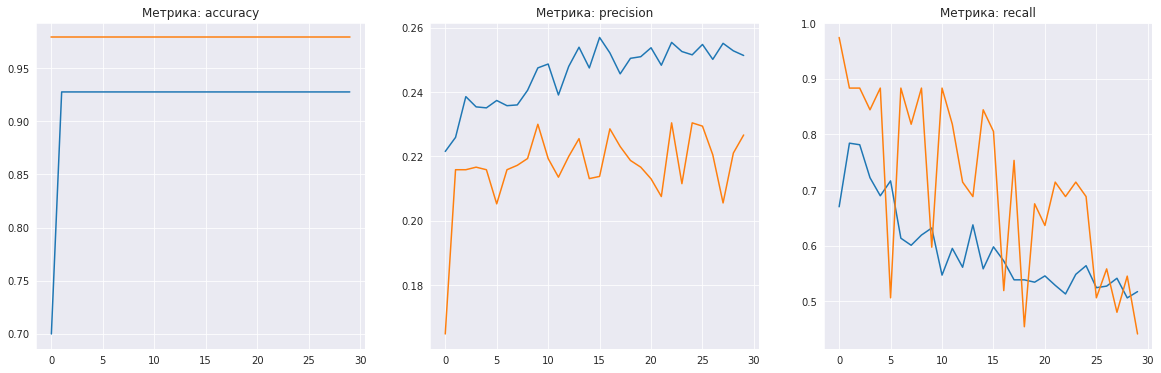

Максимальная точность на обучающей выборке: 0.928
Максимальная точность на проверочной выборке: 0.979
Максимальная метрика precision  на обучающей выборке: 0.257
Максимальная метрика precision  на проверочной выборке: 0.23
Максимальная метрика recall на обучающей выборке: 0.784
Максимальная метрика recall на проверочной выборке: 0.974


In [ ]:
bot = [1, 10, 5, 1, 0.3, 0, 2, 1, 0, 0.2, 1, 5, 2, 0, 0.1, 9, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]
worker.create_net_from_bot(bot)